# Map Google Drive เข้ากับ Colab

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load data เข้า DataFrame

In [1]:
import pandas as pd
df = pd.read_csv('../rximage/table.csv')

In [2]:
len(df)

4392

In [9]:
df.dropna(inplace=True) # remove empty data in any rows

In [10]:
len(df)

4332

In [11]:
df.columns

Index(['ndc11', 'rxcui', 'name', 'rxnavImageObjectId', 'rxnavImageFileName',
       'nlmImageFileName', 'RXNAV 120', 'RXBASE 120', 'RXNAV 300',
       'RXBASE 300', 'RXNAV 600', 'RXBASE 600', 'RXNAV 800', 'RXBASE 800',
       'RXNAV 1024', 'RXBASE 1024', 'RXNAV ORIGINAL', 'RXBASE ORIGINAL'],
      dtype='object')

In [12]:
# remove not mention data
df1 = df[['name','RXNAV 120', 'RXBASE 120', 'RXNAV 300',
       'RXBASE 300', 'RXNAV 600', 'RXBASE 600', 'RXNAV 800', 'RXBASE 800',
       'RXNAV 1024', 'RXBASE 1024', 'RXNAV ORIGINAL', 'RXBASE ORIGINAL']]
df1

,name,RXNAV 120,RXBASE 120,RXNAV 300,RXBASE 300,RXNAV 600,RXBASE 600,RXNAV 800,RXBASE 800,RXNAV 1024,RXBASE 1024,RXNAV ORIGINAL,RXBASE ORIGINAL
0,Loperamide Hydrochloride 2 MG Oral Capsule,image/images/gallery/120/00093-0311-01_RXNAVIM...,image/images/gallery/120/00093-0311-01_NLMIMAG...,image/images/gallery/300/00093-0311-01_RXNAVIM...,image/images/gallery/300/00093-0311-01_NLMIMAG...,image/images/gallery/600/00093-0311-01_RXNAVIM...,image/images/gallery/600/00093-0311-01_NLMIMAG...,image/images/gallery/800/00093-0311-01_RXNAVIM...,image/images/gallery/800/00093-0311-01_NLMIMAG...,image/images/gallery/1024/00093-0311-01_RXNAVI...,image/images/gallery/1024/00093-0311-01_NLMIMA...,image/images/gallery/original/00093-0311-01_RX...,image/images/gallery/original/00093-0311-01_NL...
1,Minocycline 50 MG Oral Capsule,image/images/gallery/120/00093-3165-01_RXNAVIM...,image/images/gallery/120/00093-3165-01_NLMIMAG...,image/images/gallery/300/00093-3165-01_RXNAVIM...,image/images/gallery/300/00093-3165-01_NLMIMAG...,image/images/gallery/600/00093-3165-01_RXNAVIM...,image/images/gallery/600/00093-3165-01_NLMIMAG...,image/images/gallery/800/00093-3165-01_RXNAVIM...,image/images/gallery/800/00093-3165-01_NLMIMAG...,image/images/gallery/1024/00093-3165-01_RXNAVI...,image/images/gallery/1024/00093-3165-01_NLMIMA...,image/images/gallery/original/00093-3165-01_RX...,image/images/gallery/original/00093-3165-01_NL...
2,Nortriptyline 10 MG Oral Capsule,image/images/gallery/120/00093-0810-01_RXNAVIM...,image/images/gallery/120/00093-0810-01_NLMIMAG...,image/images/gallery/300/00093-0810-01_RXNAVIM...,image/images/gallery/300/00093-0810-01_NLMIMAG...,image/images/gallery/600/00093-0810-01_RXNAVIM...,image/images/gallery/600/00093-0810-01_NLMIMAG...,image/images/gallery/800/00093-0810-01_RXNAVIM...,image/images/gallery/800/00093-0810-01_NLMIMAG...,image/images/gallery/1024/00093-0810-01_RXNAVI...,image/images/gallery/1024/00093-0810-01_NLMIMA...,image/images/gallery/original/00093-0810-01_RX...,image/images/gallery/original/00093-0810-01_NL...
3,Nortriptyline 25 MG Oral Capsule,image/images/gallery/120/00093-0811-01_RXNAVIM...,image/images/gallery/120/00093-0811-01_NLMIMAG...,image/images/gallery/300/00093-0811-01_RXNAVIM...,image/images/gallery/300/00093-0811-01_NLMIMAG...,image/images/gallery/600/00093-0811-01_RXNAVIM...,image/images/gallery/600/00093-0811-01_NLMIMAG...,image/images/gallery/800/00093-0811-01_RXNAVIM...,image/images/gallery/800/00093-0811-01_NLMIMAG...,image/images/gallery/1024/00093-0811-01_RXNAVI...,image/images/gallery/1024/00093-0811-01_NLMIMA...,image/images/gallery/original/00093-0811-01_RX...,image/images/gallery/original/00093-0811-01_NL...
4,Nortriptyline 50 MG Oral Capsule,image/images/gallery/120/00093-0812-01_RXNAVIM...,image/images/gallery/120/00093-0812-01_NLMIMAG...,image/images/gallery/300/00093-0812-01_RXNAVIM...,image/images/gallery/300/00093-0812-01_NLMIMAG...,image/images/gallery/600/00093-0812-01_RXNAVIM...,image/images/gallery/600/00093-0812-01_NLMIMAG...,image/images/gallery/800/00093-0812-01_RXNAVIM...,image/images/gallery/800/00093-0812-01_NLMIMAG...,image/images/gallery/1024/00093-0812-01_RXNAVI...,image/images/gallery/1024/00093-0812-01_NLMIMA...,image/images/gallery/original/00093-0812-01_RX...,image/images/gallery/original/00093-0812-01_NL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,Enalapril Maleate 2.5 MG Oral Tablet,image/images/gallery/120/16714-0442-01_RXNAVIM...,image/images/gallery/120/16714-0442-01_NLMIMAG...,image/images/gallery/300/16714-0442-01_RXNAVIM...,image/images/gallery/300/16714-0442-01_NLMIMAG...,image/images/gallery/600/16714-0442-01_RXNAVIM...,image/images/gallery/600/16714-0442-01_NLMIMAG...,image/images/gallery/800/16714-0442-01_RXNAVIM...,image/images/gallery/800/16714-0442-01_NLMIMAG...,image/images/gallery/1024/16714-0442-01_RXNAVI...,image/images/gallery/1024/16714-0442-01_NLMIMA...,image/images/gallery/original/16714-0442-01_RX...,image/images/gallery/orig

In [18]:
# Convert width format to long format
df2 = pd.melt(df1, id_vars='name', value_vars=['RXNAV 120', 'RXBASE 120', 'RXNAV 300',
       'RXBASE 300', 'RXNAV 600', 'RXBASE 600', 'RXNAV 800', 'RXBASE 800',
       'RXNAV 1024', 'RXBASE 1024', 'RXNAV ORIGINAL', 'RXBASE ORIGINAL'],var_name='resolution', value_name='path')

In [19]:
df2

,name,resolution,path
0,Loperamide Hydrochloride 2 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-0311-01_RXNAVIM...
1,Minocycline 50 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-3165-01_RXNAVIM...
2,Nortriptyline 10 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-0810-01_RXNAVIM...
3,Nortriptyline 25 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-0811-01_RXNAVIM...
4,Nortriptyline 50 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-0812-01_RXNAVIM...
...,...,...,...
51979,Enalapril Maleate 2.5 MG Oral Tablet,RXBASE ORIGINAL,image/images/gallery/original/16714-0442-01_NL...
51980,quinapril 5 MG Oral Tablet,RXBASE ORIGINAL,image/images/gallery/original/31722-0267-90_NL...
51981,trospium chloride 20 MG Oral Tablet,RXBASE ORIGINAL,image/images/gallery/original/00574-0145-60_NL...
51982,metaxalone 400 MG Oral Tablet,RXBASE ORIGINAL,image/images/gallery/original/64720-0126-10_NL...


In [20]:
# ใส่ status ว่าไฟล์ภาพมีจริงหรือไม่
import os
from tqdm.notebook import tqdm
main_path = './rximage'
status = []
for p in tqdm(df2['path']):
  if os.path.exists(os.path.join(main_path, p)):
    status.append(True)
  else:
    status.append(False)

  0%|          | 0/51984 [00:00<?, ?it/s]

In [21]:
df2['has_image'] = pd.DataFrame(status)

In [22]:
df2[df2.has_image==False] # Slice dataframe ออกมาว่าอันไหนไม่มีไฟล์ภาพ

,name,resolution,path,has_image
38988,Loperamide Hydrochloride 2 MG Oral Capsule,RXBASE 1024,image/images/gallery/1024/00093-0311-01_NLMIMA...,False
38989,Minocycline 50 MG Oral Capsule,RXBASE 1024,image/images/gallery/1024/00093-3165-01_NLMIMA...,False
38990,Nortriptyline 10 MG Oral Capsule,RXBASE 1024,image/images/gallery/1024/00093-0810-01_NLMIMA...,False
38991,Nortriptyline 25 MG Oral Capsule,RXBASE 1024,image/images/gallery/1024/00093-0811-01_NLMIMA...,False
38992,Nortriptyline 50 MG Oral Capsule,RXBASE 1024,image/images/gallery/1024/00093-0812-01_NLMIMA...,False
...,...,...,...,...
43315,Enalapril Maleate 2.5 MG Oral Tablet,RXBASE 1024,image/images/gallery/1024/16714-0442-01_NLMIMA...,False
43316,quinapril 5 MG Oral Tablet,RXBASE 1024,image/images/gallery/1024/31722-0267-90_NLMIMA...,False
43317,trospium chloride 20 MG Oral Tablet,RXBASE 1024,image/images/gallery/1024/00574-0145-60_NLMIMA...,False
43318,metaxalone 400 MG Oral Tablet,RXBASE 1024,image/images/gallery/1024/64720-0126-10_NLMIMA...,False


In [23]:
# ตัด row ที่ไม่มีไฟล์ภาพออก
df2 = df2[df2.has_image==True]

In [24]:
len(df2)

47652

In [ ]:
df2.to_csv('/content/drive/MyDrive/datasets/drug_c3pi/drug_data_long_format.csv')

# ทำ Grouping name

In [26]:
group = list(df2.name.unique())

In [27]:
group.sort()

In [28]:
group

['12 HR Acetazolamide 500 MG Extended Release Oral Capsule',
 '12 HR Acetazolamide 500 MG Extended Release Oral Capsule [Diamox]',
 '12 HR Albuterol 4 MG Extended Release Oral Tablet',
 '12 HR Amoxicillin 1000 MG / Clavulanate 62.5 MG Extended Release Oral Tablet',
 '12 HR Bupropion Hydrochloride 100 MG Extended Release Oral Tablet',
 '12 HR Bupropion Hydrochloride 100 MG Extended Release Oral Tablet [Budeprion]',
 '12 HR Bupropion Hydrochloride 100 MG Extended Release Oral Tablet [Wellbutrin]',
 '12 HR Bupropion Hydrochloride 150 MG Extended Release Oral Tablet',
 '12 HR Bupropion Hydrochloride 150 MG Extended Release Oral Tablet [Budeprion]',
 '12 HR Bupropion Hydrochloride 150 MG Extended Release Oral Tablet [Wellbutrin]',
 '12 HR Bupropion Hydrochloride 200 MG Extended Release Oral Tablet',
 '12 HR Bupropion Hydrochloride 200 MG Extended Release Oral Tablet [Wellbutrin]',
 '12 HR Bupropion Hydrochloride 90 MG / Naltrexone hydrochloride 8 MG Extended Release Oral Tablet [Contrave]',

In [29]:
len(group)

2111

In [ ]:
pd.DataFrame(group,columns=['name']).to_csv('/content/drive/MyDrive/datasets/drug_c3pi/group.csv')

# ย้ายไฟล์ภาพยามารวมกันที่ /content/drive/MyDrive/datasets/drug_c3pi/4train/images

In [30]:
len(df2)

47652

In [65]:
# เอา row ที่ข่้อมูลซ้ำกันออก
df3 = df2.drop_duplicates()
len(df3)

47502

In [ ]:
'abc dd'.replace(' ','-')

'abc-dd'

In [77]:
import shutil
from tqdm.notebook import tqdm
main_path = './rximage'
# dst_path = '/content/drive/MyDrive/datasets/drug_c3pi/4train/images'
dst_path = './images'
im_file = []

# if os.path.exists(dst_path):
#   shutil.rmtree(dst_path)
#   os.makedirs(dst_path)
# else:
#   os.makedirs(dst_path)

for idx in tqdm(df3.index):
  path = os.path.join(main_path,df3.loc[idx].path)
  dst = os.path.join(dst_path,df3.loc[idx].resolution.replace(' ','-')+'_'+df3.loc[idx]['path'].split('/')[-1])
  # print(f'dst = {dst}')
  # if dst.split('/')[-1] == 'NaN':
  #   print(dst)
  im_file.append(dst.split('/')[-1])
  if os.path.exists(dst):
    print(f'source {path}')
    print(f'{dst} is already exists')
  else:
    # shutil.copy(path, dst)
    pass

  0%|          | 0/47502 [00:00<?, ?it/s]

In [78]:
len(im_file)

47502

In [87]:
df3.insert(4, 'im_file', im_file)

In [88]:
df3

,name,resolution,path,has_image,im_file
0,Loperamide Hydrochloride 2 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-0311-01_RXNAVIM...,True,RXNAV-120_00093-0311-01_RXNAVIMAGE10_26211358.jpg
1,Minocycline 50 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-3165-01_RXNAVIM...,True,RXNAV-120_00093-3165-01_RXNAVIMAGE10_36231B28.jpg
2,Nortriptyline 10 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-0810-01_RXNAVIM...,True,RXNAV-120_00093-0810-01_RXNAVIMAGE10_24231228.jpg
3,Nortriptyline 25 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-0811-01_RXNAVIM...,True,RXNAV-120_00093-0811-01_RXNAVIMAGE10_20231018.jpg
4,Nortriptyline 50 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-0812-01_RXNAVIM...,True,RXNAV-120_00093-0812-01_RXNAVIMAGE10_2D2316D8.jpg
...,...,...,...,...,...
51979,Enalapril Maleate 2.5 MG Oral Tablet,RXBASE ORIGINAL,image/images/gallery/original/16714-0442-01_NL...,True,RXBASE-ORIGINAL_16714-0442-01_NLMIMAGE10_DC4D6...
51980,quinapril 5 MG Oral Tablet,RXBASE ORIGINAL,image/images/gallery/original/31722-0267-90_NL...,True,RXBASE-ORIGINAL_31722-0267-90_NLMIMAGE10_EA507...
51981,trospium chloride 20 MG Oral Tablet,RXBASE ORIGINAL,image/images/gallery/original/00574-0145-60_NL...,True,RXBASE-ORIGINAL_00574-0145-60_NLMIMAGE10_3C519...
51982,metaxalone 400 MG Oral Tablet,RXBASE ORIGINAL,image/images/gallery/original/64720-0126-10_NL...,True,RXBASE-ORIGINAL_64720-0126-10_NLMIMAGE10_C6506...


In [89]:
df3.to_csv('drug_cleaned.csv')

# รวมไฟล์ภาพกับ group

In [3]:
import pandas as pd
df4 = pd.read_csv('drug_cleaned.csv')
group = pd.read_csv('group.csv')

In [6]:
group.rename(columns={"Unnamed: 0": "class"},inplace=True)

In [9]:
group.head()

,class,name
0,0,12 HR Acetazolamide 500 MG Extended Release Or...
1,1,12 HR Acetazolamide 500 MG Extended Release Or...
2,2,12 HR Albuterol 4 MG Extended Release Oral Tablet
3,3,12 HR Amoxicillin 1000 MG / Clavulanate 62.5 M...
4,4,12 HR Bupropion Hydrochloride 100 MG Extended ...


In [8]:
df4.rename(columns={"Unnamed: 0": "idx"},inplace=True)

In [10]:
df4.head()

,idx,name,resolution,path,has_image,im_file
0,0,Loperamide Hydrochloride 2 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-0311-01_RXNAVIM...,True,RXNAV-120_00093-0311-01_RXNAVIMAGE10_26211358.jpg
1,1,Minocycline 50 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-3165-01_RXNAVIM...,True,RXNAV-120_00093-3165-01_RXNAVIMAGE10_36231B28.jpg
2,2,Nortriptyline 10 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-0810-01_RXNAVIM...,True,RXNAV-120_00093-0810-01_RXNAVIMAGE10_24231228.jpg
3,3,Nortriptyline 25 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-0811-01_RXNAVIM...,True,RXNAV-120_00093-0811-01_RXNAVIMAGE10_20231018.jpg
4,4,Nortriptyline 50 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-0812-01_RXNAVIM...,True,RXNAV-120_00093-0812-01_RXNAVIMAGE10_2D2316D8.jpg


In [11]:
df5 = pd.merge(df4, group, on='name', how='left')

In [12]:
df5

,idx,name,resolution,path,has_image,im_file,class
0,0,Loperamide Hydrochloride 2 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-0311-01_RXNAVIM...,True,RXNAV-120_00093-0311-01_RXNAVIMAGE10_26211358.jpg,1052
1,1,Minocycline 50 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-3165-01_RXNAVIM...,True,RXNAV-120_00093-3165-01_RXNAVIMAGE10_36231B28.jpg,1137
2,2,Nortriptyline 10 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-0810-01_RXNAVIM...,True,RXNAV-120_00093-0810-01_RXNAVIMAGE10_24231228.jpg,1193
3,3,Nortriptyline 25 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-0811-01_RXNAVIM...,True,RXNAV-120_00093-0811-01_RXNAVIMAGE10_20231018.jpg,1194
4,4,Nortriptyline 50 MG Oral Capsule,RXNAV 120,image/images/gallery/120/00093-0812-01_RXNAVIM...,True,RXNAV-120_00093-0812-01_RXNAVIMAGE10_2D2316D8.jpg,1195
...,...,...,...,...,...,...,...
47497,51979,Enalapril Maleate 2.5 MG Oral Tablet,RXBASE ORIGINAL,image/images/gallery/original/16714-0442-01_NL...,True,RXBASE-ORIGINAL_16714-0442-01_NLMIMAGE10_DC4D6...,708
47498,51980,quinapril 5 MG Oral Tablet,RXBASE ORIGINAL,image/images/gallery/original/31722-0267-90_NL...,True,RXBASE-ORIGINAL_31722-0267-90_NLMIMAGE10_EA507...,1844
47499,51981,trospium chloride 20 MG Oral Tablet,RXBASE ORIGINAL,image/images/gallery/original/00574-0145-60_NL...,True,RXBASE-ORIGINAL_00574-0145-60_NLMIMAGE10_3C519...,1959
47500,51982,metaxalone 400 MG Oral Tablet,RXBASE ORIGINAL,image/images/gallery/original/64720-0126-10_NL...,True,RXBASE-ORIGINAL_64720-0126-10_NLMIMAGE10_C6506...,1749


In [13]:
df5.to_csv('image_class.csv', index=False)

# $\color{red}{ทดลองหาชื่อสั่นๆของยา}$

In [ ]:
import re
df2['main_drug'] = df2.name.apply(lambda v: v[:re.search("\d",v[5:]).start()+5]).str.strip()

In [ ]:
df2['main_drug'] = df2['main_drug'].str.replace('24 HR ','',regex=True)

In [ ]:
df2[df2.main_drug.str.contains('\(')]

,name,resolution,path,main_drug
493,{35 (lamotrigine 25 MG Oral Tablet [Lamictal])...,RXNAV 120,image/images/gallery/120/00173-0633-10_RXNAVIM...,{35 (lamotrigine
496,{24 (Ethinyl Estradiol 0.01 MG / norethindrone...,RXNAV 120,image/images/gallery/120/00430-0420-14_RXNAVIM...,{24 (Ethinyl Estradiol
522,{6 (Azithromycin 250 MG Oral Tablet) } Pack,RXNAV 120,image/images/gallery/120/00093-7146-18_RXNAVIM...,{6 (Azithromycin
676,"Estrogens, Esterified (USP) 0.625 MG / Methylt...",RXNAV 120,image/images/gallery/120/53746-0077-01_RXNAVIM...,"Estrogens, Esterified (USP)"
677,"Estrogens, Esterified (USP) 1.25 MG / Methylte...",RXNAV 120,image/images/gallery/120/53746-0078-01_RXNAVIM...,"Estrogens, Esterified (USP)"
...,...,...,...,...
51901,{21 (Methylprednisolone 4 MG Oral Tablet) } Pack,RXBASE ORIGINAL,image/images/gallery/original/59762-4440-02_NL...,{21 (Methylprednisolone
51949,thyroid (USP) 16.25 MG Oral Tablet [Nature-Thr...,RXBASE ORIGINAL,image/images/gallery/original/64727-3298-01_NL...,thyroid (USP)
51960,thyroid (USP) 65 MG Oral Tablet [Nature-Throid],RXBASE ORIGINAL,image/images/gallery/original/64727-3300-01_NL...,thyroid (USP)
51964,thyroid (USP) 32.5 MG Oral Tablet [Nature-Throid],RXBASE ORIGINAL,image/images/gallery/original/64727-3299-01_NL...,thyroid (USP)


In [ ]:
df2.name.value_counts()

name
pantoprazole 40 MG Delayed Release Oral Tablet                                                                                                        120
Simvastatin 5 MG Oral Tablet                                                                                                                          108
Lisinopril 5 MG Oral Tablet                                                                                                                           108
Lisinopril 20 MG Oral Tablet                                                                                                                          108
{21 (Ethinyl Estradiol 0.02 MG / norethindrone acetate 1 MG Oral Tablet) / 7 (Ferrous fumarate 75 MG Oral Tablet) } Pack [Loestrin Fe 1/20 28 Day]     96
                                                                                                                                                     ... 
solifenacin succinate 5 MG Oral Tablet [Vesicare]                      

In [ ]:
print(df2.name[496])

{24 (Ethinyl Estradiol 0.01 MG / norethindrone acetate 1 MG Oral Tablet) / 2 (Ethinyl Estradiol 0.01 MG Oral Tablet) / 2 (Ferrous fumarate 75 MG Oral Tablet) } Pack [Lo Loestrin Fe 28 Day]


/content/drive/MyDrive/datasets/drug_c3pi/rximage/image/images/gallery/120/00430-0420-14_RXNAVIMAGE10_28401420.jpg


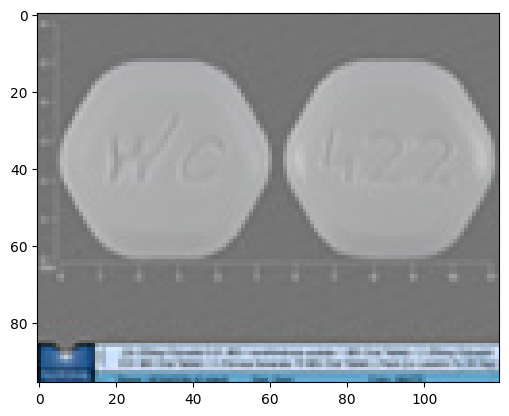

In [ ]:
import matplotlib.pyplot as plt
import os
path = os.path.join('/content/drive/MyDrive/datasets/drug_c3pi/rximage',df2.path[496])
print(path)
if os.path.exists(path):
  im = plt.imread(path)
  plt.imshow(im)
else:
  print('no file')

In [ ]:
df2[df2.main_drug.str.contains('\(')].main_drug.str.split('(')

493                 [{35 , lamotrigine]
496           [{24 , Ethinyl Estradiol]
522                 [{6 , Azithromycin]
676      [Estrogens, Esterified , USP)]
677      [Estrogens, Esterified , USP)]
                      ...              
51901        [{21 , Methylprednisolone]
51949                  [thyroid , USP)]
51960                  [thyroid , USP)]
51964                  [thyroid , USP)]
51974                  [thyroid , USP)]
Name: main_drug, Length: 3132, dtype: object

In [ ]:
df2['main_drug'].str.contains("\(")

0        False
1        False
2        False
3        False
4        False
         ...  
51979    False
51980    False
51981    False
51982    False
51983    False
Name: main_drug, Length: 51984, dtype: bool

In [ ]:
df2[df2.main_drug.str.startswith('{')]

,name,resolution,path,main_drug
493,{35 (lamotrigine 25 MG Oral Tablet [Lamictal])...,RXNAV 120,image/images/gallery/120/00173-0633-10_RXNAVIM...,{35 (lamotrigine
496,{24 (Ethinyl Estradiol 0.01 MG / norethindrone...,RXNAV 120,image/images/gallery/120/00430-0420-14_RXNAVIM...,{24 (Ethinyl Estradiol
522,{6 (Azithromycin 250 MG Oral Tablet) } Pack,RXNAV 120,image/images/gallery/120/00093-7146-18_RXNAVIM...,{6 (Azithromycin
935,{5 (moxifloxacin 400 MG Oral Tablet [Avelox]) ...,RXNAV 120,image/images/gallery/120/00085-1733-03_RXNAVIM...,{5 (moxifloxacin
1175,{6 (Azithromycin 250 MG Oral Tablet) } Pack,RXNAV 120,image/images/gallery/120/50111-0787-66_RXNAVIM...,{6 (Azithromycin
...,...,...,...,...
51713,{21 (Ethinyl Estradiol 0.03 MG / norethindrone...,RXBASE ORIGINAL,image/images/gallery/original/51285-0127-97_NL...,{21 (Ethinyl Estradiol
51714,{21 (Ethinyl Estradiol 0.02 MG / norethindrone...,RXBASE ORIGINAL,image/images/gallery/original/51285-0131-97_NL...,{21 (Ethinyl Estradiol
51719,{21 (Ethinyl Estradiol 0.02 MG / norethindrone...,RXBASE ORIGINAL,image/images/gallery/original/52544-0276-21_NL...,{21 (Ethinyl Estradiol
51757,{4 (risedronate sodium 35 MG Delayed Release O...,RXBASE ORIGINAL,image/images/gallery/original/00430-0979-03_NL...,{4 (risedronate sodium


In [ ]:
df2[df2.main_drug.str.startswith('24')]

,name,resolution,path,main_drug
